In [2]:
# Dependencies 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import scipy as sp
import requests
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd
from io import StringIO

In [52]:
# CSV file path
base_df = pd.read_csv("../Resources/steam_games.csv", encoding='latin1')

# filter
steam_df = base_df[['name', 'categories', 'genres', 'platforms', 'total_reviews', 'metacritic','price_initial (USD)']]

# drop null metacritic or total review 
steam_df = steam_df.dropna(subset=['metacritic', 'total_reviews'])
steam_df = steam_df[(steam_df['metacritic'] != 0) & (steam_df['total_reviews'] != 0)]

steam_df['name'].nunique()



2508

In [53]:
# top 20 games 
top_games = steam_df.sort_values(['metacritic'], ascending = False)
top_games.head(20)


,name,categories,genres,platforms,total_reviews,metacritic,price_initial (USD)
65980,Disco Elysium - The Final Cut,"['Single-player', 'Steam Achievements', 'Full ...",['RPG'],"['windows', 'mac']",48258,97,39.99
64908,Baldur's Gate 3,"['Single-player', 'Multi-player', 'Co-op', 'On...","['Adventure', 'RPG', 'Strategy']","['windows', 'mac']",388098,96,59.99
63866,Grand Theft Auto V,"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Adventure']",['windows'],551680,96,0.00
42643,Persona 5 Royal,"['Single-player', 'Steam Achievements', 'Full ...",['RPG'],['windows'],24001,95,59.99
56043,Quake,"['Single-player', 'Multi-player', 'PvP', 'Onli...",['Action'],['windows'],8943,94,9.99
58159,Mass Effect 2 (2010) Edition,['Single-player'],['RPG'],['windows'],101,94,29.99
55298,Divinity: Original Sin - Enhanced Edition,"['Single-player', 'Multi-player', 'Co-op', 'Sh...","['Adventure', 'Indie', 'RPG', 'Strategy']","['windows', 'mac', 'linux']",10128,94,39.99
12044,The Elder Scrolls IV: OblivionÂ® Game of the Y...,"['Single-player', 'Steam Cloud', 'Family Shari...",[],['windows'],29186,94,19.99
24183,Caves of Qud,"['Single-player', 'Steam Achievements', 'Full ...","['Adventure', 'Indie', 'RPG', 'Strategy']","['windows', 'mac', 'linux']",8181,94,29.99
62571,TetrisÂ® Effect: Connected,"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Casual', 'Indie']",['windows'],4791,93,39.99


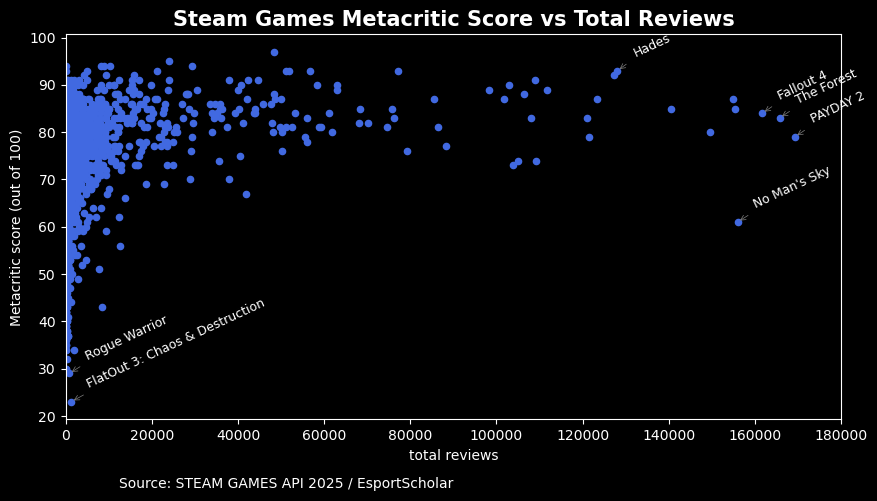

In [107]:
#Scatterplot using Pandas
steam_df.plot(kind='scatter', x='total_reviews', y='metacritic', figsize=(10, 5), color='royalblue')

#Title and Labels
plt.title('Steam Games Metacritic Score vs Total Reviews', fontweight='bold', fontsize=15)
plt.xlabel('total reviews')
plt.ylabel('Metacritic score (out of 100)')
plt.text(0.5, -0.15, "Source: STEAM GAMES API 2025 / EsportScholar",
         transform=plt.gca().transAxes,  # use axes coordinates
         fontsize=10, ha='right', va='top')
plt.style.use('dark_background')
plt.xlim(0,180000)

for idx, row in steam_df.iterrows():
    if row['total_reviews'] > 160000 or row['metacritic'] < 30 or row['metacritic'] > 92 and row["total_reviews"] > 80000 or row['metacritic'] < 70 and row["total_reviews"] > 140000:
        plt.annotate(
            row['name'], 
            (row['total_reviews'], row['metacritic']),
            xytext=(10, 10),  # Offset to prevent overlap
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),  # Optional arrow
            fontsize=9, rotation=25 # Rotate labels slightly
        )

plt.show()

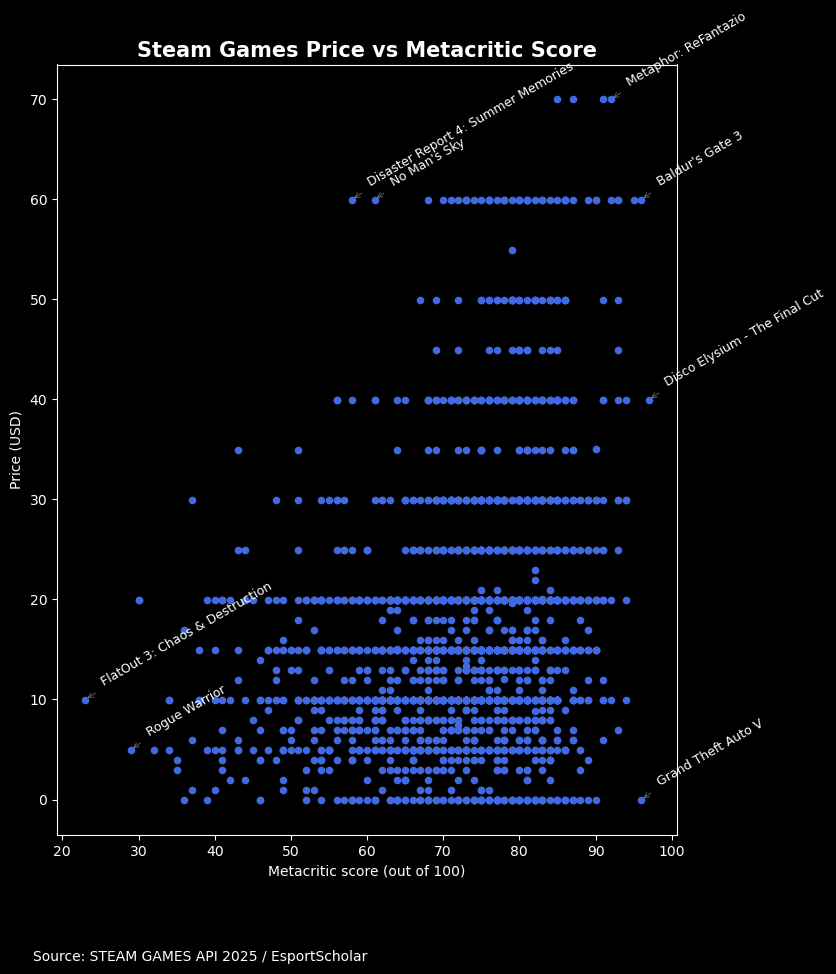

In [119]:
#Scatterplot using Pandas
steam_df.plot(kind='scatter', x='metacritic', y='price_initial (USD)', figsize=(8, 10), color='royalblue')

#Title and Labels
plt.title('Steam Games Price vs Metacritic Score', fontweight='bold', fontsize=15)
plt.xlabel('Metacritic score (out of 100)')
plt.ylabel('Price (USD)')
plt.text(0.5, -0.15, "Source: STEAM GAMES API 2025 / EsportScholar",
         transform=plt.gca().transAxes,  # use axes coordinates
         fontsize=10, ha='right', va='top')
plt.style.use('dark_background')

for idx, row in steam_df.iterrows():
    if row['metacritic'] > 95 or (row['price_initial (USD)'] > 65 and row["metacritic"] > 91) or (row['price_initial (USD)'] < 10 and row['metacritic'] < 30) or (row['price_initial (USD)'] > 50 and row['metacritic'] < 65):
        plt.annotate(
            row['name'], 
            (row['metacritic'], row['price_initial (USD)']),
            xytext=(10, 10),  # Offset to prevent overlap
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),  # Optional arrow
            fontsize=9, rotation=30  # Rotate labels slightly
        )

plt.show()

In [108]:
#P value testing

correlation, p_value = sp.stats.pearsonr(steam_df['price_initial (USD)'], steam_df['metacritic'])

print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.2766
P-value: 2.616816522134407e-45


In [59]:
most_expensive = steam_df.sort_values(['price_initial (USD)'], ascending = False)
most_expensive.head(25)

,name,categories,genres,platforms,total_reviews,metacritic,price_initial (USD)
64060,DYNASTY WARRIORS: ORIGINS,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'RPG', 'Strategy']",['windows'],1711,85,69.99
63648,TEKKEN 8,"['Single-player', 'Multi-player', 'PvP', 'Onli...",['Action'],['windows'],17040,91,69.99
61933,Metaphor: ReFantazio,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure', 'RPG']",['windows'],9334,92,69.99
61939,Indiana Jones and the Great Circle,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure']",['windows'],4052,87,69.99
63994,Street Fighterâ¢ 6,"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Adventure']",['windows'],15905,92,59.99
68875,Cyberpunk 2077,"['Single-player', 'Steam Achievements', 'Full ...",['RPG'],['windows'],318186,86,59.99
61579,Hogwarts Legacy,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure', 'RPG']",['windows'],121078,83,59.99
64222,Total War: WARHAMMER,"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Strategy']","['windows', 'mac', 'linux']",17838,86,59.99
64217,Total War: THREE KINGDOMS,"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Strategy']","['windows', 'mac', 'linux']",16057,85,59.99
64196,Total War: ROME II - Emperor Edition,"['Single-player', 'Multi-player', 'PvP', 'Onli...",['Strategy'],['windows'],29166,76,59.99


In [27]:
games_count = steam_df["name"].nunique()
games_count

2508

In [28]:
review_count = steam_df["total_reviews"].sum()
review_count

14749234

In [34]:
# Adding Metacritic Buckets
bins = [0,25,50,75,100]
labels = ['Low','Mid Low','Mid','High']

steam_df['Rating Group'] = pd.cut(
    steam_df["metacritic"], bins=bins, labels=labels
)
steam_df.head()

,name,categories,genres,platforms,total_reviews,metacritic,Metacritic Rating Group,Rating Group
1131,Deathwish Enforcers Special Edition,"['Single-player', 'Multi-player', 'Co-op', 'Sh...",['Action'],['windows'],44,81,High,High
1227,Rails Across America,"['Single-player', 'Multi-player', 'PvP', 'LAN ...","['Simulation', 'Strategy']",['windows'],10,81,High,High
5566,Tormenture,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure', 'Indie']",['windows'],91,78,High,High
6173,Dead Rising Deluxe Remaster,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure']",['windows'],1916,79,High,High
7066,Devolver Bootleg,"['Single-player', 'Partial Controller Support'...","['Action', 'Adventure', 'Casual', 'Indie', 'Sp...",['windows'],751,69,Mid,Mid


In [36]:
high_meta = steam_df[steam_df['Rating Group'] == 'High']
high_meta

,name,categories,genres,platforms,total_reviews,metacritic,Metacritic Rating Group,Rating Group
1131,Deathwish Enforcers Special Edition,"['Single-player', 'Multi-player', 'Co-op', 'Sh...",['Action'],['windows'],44,81,High,High
1227,Rails Across America,"['Single-player', 'Multi-player', 'PvP', 'LAN ...","['Simulation', 'Strategy']",['windows'],10,81,High,High
5566,Tormenture,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure', 'Indie']",['windows'],91,78,High,High
6173,Dead Rising Deluxe Remaster,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure']",['windows'],1916,79,High,High
7157,Still There,"['Single-player', 'Steam Achievements', 'Steam...",['Adventure'],"['windows', 'mac']",411,77,High,High
...,...,...,...,...,...,...,...,...
70590,CORPSE FACTORY,"['Single-player', 'Steam Achievements', 'Full ...","['Adventure', 'Casual', 'Indie']",['windows'],483,80,High,High
70797,Void Sols,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure', 'Indie', 'RPG']","['windows', 'mac']",182,81,High,High
70828,Prince of Persia The Lost Crown,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure']",['windows'],1324,85,High,High
71275,Grapple Dogs: Cosmic Canines,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure']",['windows'],112,88,High,High


In [40]:
low_meta = steam_df[(steam_df['Rating Group'] == 'Low') | (steam_df['Rating Group'] == 'Low Mid')]
low_meta

,name,categories,genres,platforms,total_reviews,metacritic,Metacritic Rating Group,Rating Group
58482,FlatOut 3: Chaos & Destruction,"['Single-player', 'Multi-player', 'Co-op', 'Pa...",['Racing'],['windows'],1235,23,Low,Low


In [41]:
mid_meta = steam_df[steam_df['Rating Group'] == 'Mid']
mid_meta

,name,categories,genres,platforms,total_reviews,metacritic,Metacritic Rating Group,Rating Group
7066,Devolver Bootleg,"['Single-player', 'Partial Controller Support'...","['Action', 'Adventure', 'Casual', 'Indie', 'Sp...",['windows'],751,69,Mid,Mid
7114,A Place for the Unwilling,"['Single-player', 'Steam Achievements', 'Parti...","['Adventure', 'Indie']","['windows', 'mac']",42,73,Mid,Mid
7163,Bendy and the Dark Revival,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure']",['windows'],6492,72,Mid,Mid
7191,Vane,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure', 'Casual', 'Indie']",['windows'],98,63,Mid,Mid
7217,Conan Chop Chop,"['Single-player', 'Multi-player', 'Co-op', 'On...","['Action', 'Adventure', 'Indie']",['windows'],162,72,Mid,Mid
...,...,...,...,...,...,...,...,...
70019,Yupitergrad ð(Virtual Reality Adventure),"['Single-player', 'Steam Achievements', 'Track...","['Action', 'Adventure', 'Casual', 'Indie', 'Si...",['windows'],71,68,Mid,Mid
70080,Flat Eye,"['Single-player', 'Steam Achievements', 'Steam...","['Indie', 'Simulation']","['windows', 'mac']",58,74,Mid,Mid
70089,POSTAL: Brain Damaged,"['Single-player', 'Steam Achievements', 'Full ...",['Action'],['windows'],4134,71,Mid,Mid
70162,Tormented Souls,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure']",['windows'],1870,75,Mid,Mid


In [46]:
#Figures for sumary table
high_count = high_meta['name'].nunique()
mid_count = mid_meta['name'].nunique()
low_count = low_meta['name'].nunique()
avg_rating = steam_df['metacritic'].mean()
mode_rating = steam_df['metacritic'].mode()
median_rating = steam_df['metacritic'].median()

In [48]:
#summary table
steam_summary = pd.DataFrame({
    "Total Games": [games_count],
    "Total Reviews": [review_count], 
    "Average Review": [avg_rating], 
    "Median Rating": [median_rating],  
    "# High Rating": [high_count], 
    "# Mid Rating": [mid_count],
    "# Low Rating": [low_count]
})
steam_summary

,Total Games,Total Reviews,Average Review,Median Rating,# High Rating,# Mid Rating,# Low Rating
0,2508,14749234,72.856517,75.0,1157,1259,1


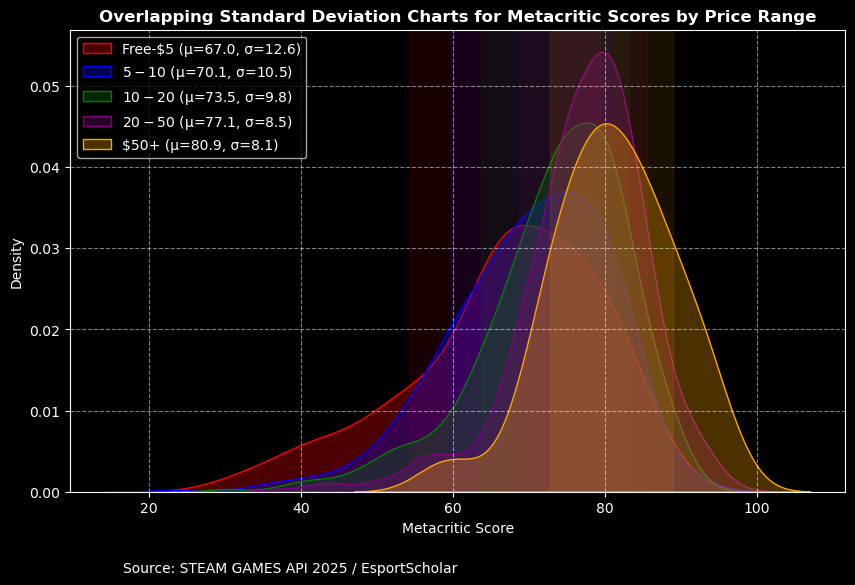

In [131]:
# Ensure Metacritic scores are numeric and drop NaN values
steam_df['metacritic'] = pd.to_numeric(steam_df['metacritic'], errors='coerce')
steam_df = steam_df.dropna(subset=['metacritic'])

# Define price categories
price_bins = [0, 5, 10, 20, 50, 100]
price_labels = ['Free-$5', '$5-$10', '$10-$20', '$20-$50', '$50+']
steam_df['Price Range'] = pd.cut(steam_df['price_initial (USD)'], bins=price_bins, labels=price_labels)

# Create the plot
plt.figure(figsize=(10, 6))

# Define colors for different price ranges
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Plot KDEs with standard deviation shading
for i, price_range in enumerate(price_labels):
    subset = steam_df[steam_df['Price Range'] == price_range]['metacritic']
    if not subset.empty:
        mean = subset.mean()
        std = subset.std()
        
        # Plot KDE
        sns.kdeplot(subset, label=f"{price_range} (μ={mean:.1f}, σ={std:.1f})", color=colors[i], fill=True, alpha=0.3)
        
        # Highlight standard deviation range
        plt.axvspan(mean - std, mean + std, color=colors[i], alpha=0.1)

# Customize the plot
plt.title("Overlapping Standard Deviation Charts for Metacritic Scores by Price Range", fontweight='bold')
plt.xlabel("Metacritic Score")
plt.ylabel("Density")
plt.text(0.5, -0.15, "Source: STEAM GAMES API 2025 / EsportScholar",
         transform=plt.gca().transAxes,  # use axes coordinates
         fontsize=10, ha='right', va='top')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()

In [128]:
#Best value games 

best_value = steam_df[
    (steam_df['metacritic'] > 85) & (steam_df['price_initial (USD)'] < 10) & (steam_df['total_reviews'] > 1500)
][['name', 'metacritic', 'price_initial (USD)', 'total_reviews']]

best_value = best_value.sort_values(['metacritic'], ascending = False)
best_value.head(10)

,name,metacritic,price_initial (USD),total_reviews
63866,Grand Theft Auto V,96,0.00,551680
56043,Quake,94,9.99,8943
54794,Undertale,92,9.99,127245
56981,Tom Clancy's Splinter CellÂ®,91,9.99,1854
26101,Super Hexagon,88,2.99,11775
26497,LIMBO,88,9.99,11340
37645,Mini Motorways,87,9.99,13713
56609,Divinity: Original Sin (Classic),87,0.00,5337
64124,HITMAN World of Assassination,87,9.99,18600
24932,Total Annihilation,86,4.99,2254


In [132]:
#Worst value games 

worst_value = steam_df[
    (steam_df['metacritic'] < 65) & (steam_df['price_initial (USD)'] > 30) & (steam_df['total_reviews'] > 1500)
][['name', 'metacritic', 'price_initial (USD)', 'total_reviews']]

worst_value = worst_value.sort_values(['metacritic'], ascending = True)
worst_value.head(10)

,name,metacritic,price_initial (USD),total_reviews
62867,Skater XL - The Ultimate Skateboarding Game,56,39.99,12618
66006,Sonic Forces,56,39.99,3513
58690,Castlevania: Lords of Shadow 2,58,39.99,1530
56233,No Man's Sky,61,59.99,155999
65941,Sword Art Online: Fatal Bullet,61,39.99,4974
51438,Hellpoint,64,34.99,1530
